In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv('student-por.csv', sep = ';')
convert_dict = {'school': str,
                'sex': str,
                'address': str,

                'famsize': str,

                'Pstatus': str,

                'Mjob': str,

                'Fjob': str,
                'reason': str,

                'guardian': str,

                'schoolsup': str,

                'famsup': str,

                'activities': str,

                'nursery': str,

                'higher': str,

                'internet': str,

                'romantic': str,
                
                }
print(df.shape)
df = df.astype(convert_dict)
for col in df.columns:
    #print(df[col].unique())
    print(col)
    #print(df[col].dtype)


df = df.replace(r'^\s*$', np.nan, regex=True)

(649, 33)
school
sex
age
address
famsize
Pstatus
Medu
Fedu
Mjob
Fjob
reason
guardian
traveltime
studytime
failures
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G2
G3


In [3]:
import plotly.express as px
corr = df.corr()
#l = px.imshow(corr, text_auto=True)
#l.show()
fig = px.imshow(corr, text_auto=True, aspect="auto", zmin=-1, zmax=1)
plt.savefig("StudentFeaturesHeatmap.png")


fig.show()

<Figure size 640x480 with 0 Axes>

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split 

# let's separate the feature matrix X, and target variable y
y = df['G3'] # remember, we want to predict who earns more than 50k or less than 50k
X = df.loc[:, df.columns != 'G3' ] # all other columns are features

random_state = 42

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)

print('training set')
print(X_train.head()) # lots of strings!
print(y_train.head()) # even our labels are strings and not numbers!

training set
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
404     GP   F   17       U     GT3       T     2     1  services     other   
46      GP   F   16       U     LE3       A     3     3     other  services   
261     GP   F   17       R     GT3       T     2     1   at_home  services   
195     GP   M   16       U     GT3       T     3     3  services     other   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... romantic famrel  freetime  goout  Dalc Walc health absences  G1  G2  
404  ...       no      4         3      5     2    4      4        4  12  16  
46   ...       no      2         3      5     1    4      3        6  13  12  
261  ...       no      2         1      1     1    1      3        2  13  13  
195  ...      yes      4         2      3     1    2      3        0  11  12  
648  ...       no      4         4      1     3    4      5        4  10  11  

[5 rows x 32 columns]
404    16
46   

In [6]:
# # Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 
# 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
# 2 sex - student's sex (binary: 'F' - female or 'M' - male) 
# 3 age - student's age (numeric: from 15 to 22) 
# 4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
# 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
# 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
# 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
# 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
# 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
# 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
# 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
# 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
# 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
# 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
# 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
# 16 schoolsup - extra educational support (binary: yes or no) 
# 17 famsup - family educational support (binary: yes or no) 
# 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
# 19 activities - extra-curricular activities (binary: yes or no) 
# 20 nursery - attended nursery school (binary: yes or no) 
# 21 higher - wants to take higher education (binary: yes or no) 
# 22 internet - Internet access at home (binary: yes or no) 
# 23 romantic - with a romantic relationship (binary: yes or no) 
# 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
# 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
# 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
# 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
# 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
# 29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
# 30 absences - number of school absences (numeric: from 0 to 93) 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
onehot_ftrs = ['school','sex', 'address','famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian','schoolsup', 'famsup','paid','activities', 'nursery', 'higher', 'internet' , 'romantic' , 'famrel', 'freetime', 'goout' ,'Dalc', 'Walc', 'health']
minmax_ftrs = ['age', 'failures', 'studytime', 'traveltime','absences', 'Medu', 'Fedu']
std_ftrs = ['G1', 'G2']

for col in X_train.columns:
    print(col)# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        #('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=True,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here
    
X_t = clf.fit_transform(X)

print(X_t.shape)

# X_train_prep = clf.fit_transform(X_train)
# X_val_prep = clf.transform(X_val)
# X_test_prep = clf.transform(X_test)

# print(X_train.shape)
# print(X_train_prep.shape)
# print(X_train_prep)





school
sex
age
address
famsize
Pstatus
Medu
Fedu
Mjob
Fjob
reason
guardian
traveltime
studytime
failures
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G2
(649, 82)


[2.25316979e-02 2.25316979e-02 4.75953203e-03 4.75953203e-03
 8.13887977e-03 8.13887977e-03 2.46754038e-03 2.46754038e-03
 8.34985553e-04 8.34985553e-04 9.54299961e-03 3.05733046e-03
 3.12866334e-03 4.12228643e-03 5.82922449e-03 3.38238852e-03
 3.78664481e-03 4.34708203e-03 4.34405780e-03 5.90483302e-03
 6.31580738e-03 6.05696004e-03 6.47823810e-03 6.61320700e-03
 3.82178995e-03 3.00577134e-03 3.21782117e-03 5.29947987e-03
 5.29947987e-03 4.21521786e-03 4.21521786e-03 3.02510922e-03
 3.02510922e-03 4.69646779e-03 4.69646779e-03 3.47846836e-03
 3.47846836e-03 2.68014303e-02 2.68014303e-02 5.33831970e-03
 5.33831970e-03 3.66493244e-03 3.66493244e-03 4.37938890e-03
 2.42741749e-03 4.62748987e-03 5.83072035e-03 3.46303882e-03
 5.05699207e-03 5.42800744e-03 2.91066470e-03 3.39893615e-03
 5.85651540e-03 7.05442113e-03 5.16497866e-03 3.25515944e-03
 2.94169976e-03 9.78312499e-03 9.31135528e-03 2.56581737e-03
 4.93645266e-03 1.49245949e-02 1.40136608e-02 2.99182623e-03
 2.27963378e-03 4.758001

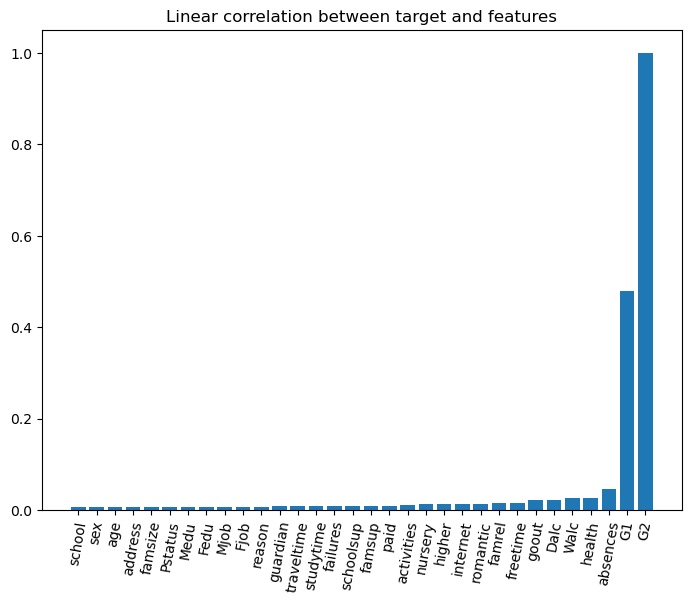

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif, mutual_info_classif

import scipy
from scipy.sparse import csr_matrix

#csr_matrix = csr_matrix(X_train.astype(pd.SparseDtype("float64", 0)).sparse.to_coo())

f_test, pval = f_classif(X_t, df['G3'])
f_test /= np.max(f_test)
print(f_test)
print(list(X_train))

mi = mutual_info_classif(X_t, df['G3'])
print(mi)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
n=32
x_labels = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences','G1', 'G2']
y_values = f_test
y_values.sort()
y_values_five = y_values[-n:]
ax.bar(x_labels,y_values_five)
plt.title('Linear correlation between target and features')
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
plt.savefig("StudentFeaturesFtest")



plt.show()





[7.40519216e-02 6.38428388e-02 0.00000000e+00 7.51215488e-03
 1.19013953e-02 7.96729680e-03 0.00000000e+00 1.85786055e-02
 0.00000000e+00 2.08835738e-02 1.92836222e-02 0.00000000e+00
 0.00000000e+00 3.60646786e-02 0.00000000e+00 1.14061543e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.31957104e-02 3.00972535e-02 2.49594301e-02
 3.13160554e-02 0.00000000e+00 1.03016303e-04 3.95050927e-02
 9.31857708e-02 4.59686166e-02 5.74944107e-04 2.24309248e-02
 1.59679359e-03 0.00000000e+00 2.42475595e-02 1.77128736e-02
 0.00000000e+00 5.46769789e-02 1.33313625e-01 0.00000000e+00
 0.00000000e+00 3.36182027e-02 2.00860614e-02 0.00000000e+00
 1.56074720e-02 5.02077186e-04 0.00000000e+00 4.13571799e-02
 1.46198246e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.37235439e-02 9.48226985e-03 3.96741435e-02
 0.00000000e+00 2.29025214e-02 3.34807930e-02 0.00000000e+00
 1.07443601e-02 0.00000000e+00 2.48164159e-02 0.00000000e+00
 0.00000000e+00 3.209866

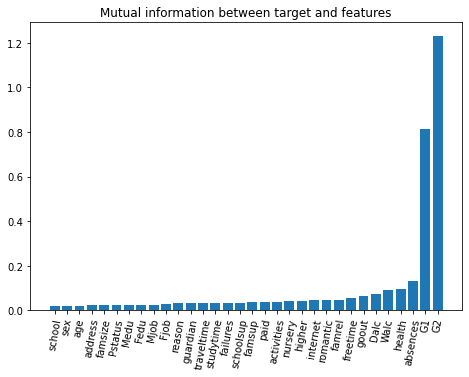

In [54]:
mi = mutual_info_classif(X_t, df['G3'], random_state=42)
print(mi)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
n=32
x_labels = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health','absences', 'G1', 'G2']
y_values = mi
y_values.sort()
y_values_five = y_values[-n:]
ax.bar(x_labels,y_values_five)
plt.title('Mutual information between target and features')
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
plt.savefig("StudentFeaturesFtest")


plt.show()

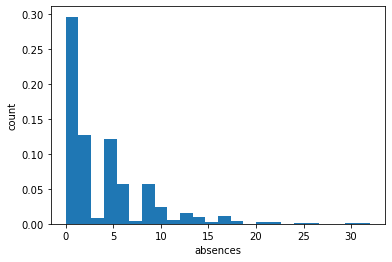

In [21]:
## plt.figure(figsize=(5,3))

df['absences'].plot.hist(bins = df['absences'].nunique(),density=True)   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
plt.xlabel('absences')
plt.ylabel('count')
plt.show()

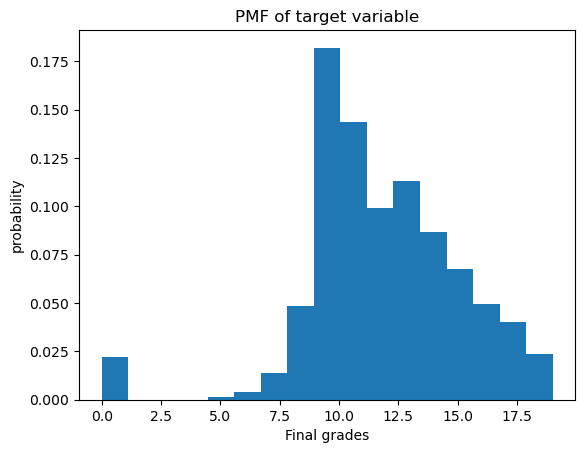

In [12]:
#plt.figure(figsize=(5,3))

df['G3'].plot.hist(bins = df['G3'].nunique(), density=True)   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
plt.xlabel('Final grades')
plt.ylabel('probability')
plt.title('PMF of target variable')
plt.savefig("PMFTarget.png")
plt.show()

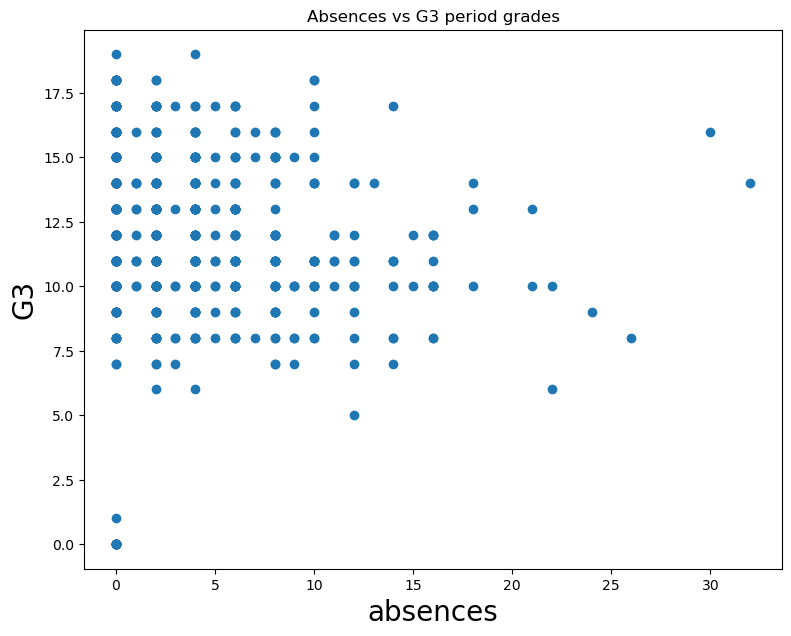

In [6]:
plt.figure(figsize=(9,7))
plt.scatter(df['absences'], df['G3'])
plt.xlabel('absences', fontsize= 20)
plt.ylabel('G3', fontsize= 20)
plt.title('Absences vs G3 period grades')


plt.show()

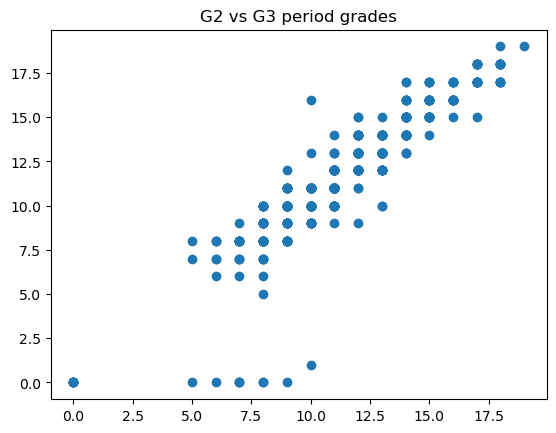

In [14]:
plt.scatter(df['G2'], df['G3'])

plt.title('G2 vs G3 period grades')
plt.show()

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
# collect the various features
cat_ftrs = ['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2',\
            'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',\
           'Heating','CentralAir','Electrical','GarageType','PavedDrive','MiscFeature','SaleType','SaleCondition']
ordinal_ftrs = ['LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',\
               'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish',\
               'GarageQual','GarageCond','PoolQC','Fence']
ordinal_cats = [['Reg','IR1','IR2','IR3'],['AllPub','NoSewr','NoSeWa','ELO'],['Gtl','Mod','Sev'],\
               ['Po','Fa','TA','Gd','Ex'],['Po','Fa','TA','Gd','Ex'],['NA','Po','Fa','TA','Gd','Ex'],\
               ['NA','Po','Fa','TA','Gd','Ex'],['NA','No','Mn','Av','Gd'],['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],\
               ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],['Po','Fa','TA','Gd','Ex'],['Po','Fa','TA','Gd','Ex'],\
               ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],['NA','Po','Fa','TA','Gd','Ex'],\
               ['NA','Unf','RFn','Fin'],['NA','Po','Fa','TA','Gd','Ex'],['NA','Po','Fa','TA','Gd','Ex'],
               ['NA','Fa','TA','Gd','Ex'],['NA','MnWw','GdWo','MnPrv','GdPrv']]
num_ftrs = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',\
             'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',\
             'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',\
             'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF',\
             'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']

In [ ]:
# preprocess with pipeline and columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

random_state = 42

# one-hot encoder
# We need to replace the NaN with a string first!
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# ordinal encoder
# We need to replace the NaN with a string first!
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

In [ ]:
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
# the feature names after fit
feature_names = preprocessor.get_feature_names_out()

# you can convert the numpy array back to a data frame with the feature names if you want
df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_CV = preprocessor.transform(X_CV)
df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
print(df_CV.shape)

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)
print(feature_names)

In [ ]:
print('data dimensions:',df_train.shape)
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df_train[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df_train.isnull().sum(axis=1)!=0)/df_train.shape[0]
print('fraction of points with missing values:',frac_missing)